# Data Visualisation GoFordBike Trip Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>   
<li><a href="#gathering">Gathering data</a></li>
<li><a href="#assess">Assessing data</a></li>
<li><a href="#qual">Quality & Tidiness</a></li>
<li><a href="#clean">Clean & Test</a></li>
<li><a href="#analyse">Analyse & Visualise</a></li>



<a id='intro'></a>
## Intro

This workbook explores a dataset from GoFordBike for Boston and Washington for the period Dec 2019 - Nov 2020. The data set includes data relating to stations, dates, duration and city and has these details for a total of 4+ milion trips. 

### Load libraries

In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
import requests
from io import BytesIO
from zipfile import ZipFile

import datetime
import calendar



<a id='gathering'></a>
## Gathering Data
### Download last available 12 months of data from Boston and Washington


In [45]:
#Boston (bluebikes)
os.makedirs('master_data/boston')
urlsb = ['https://s3.amazonaws.com/hubway-data/202011-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202010-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202009-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202008-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202007-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202006-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202005-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202004-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202003-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202002-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/202001-bluebikes-tripdata.zip',
         'https://s3.amazonaws.com/hubway-data/201912-bluebikes-tripdata.zip',]

for url in urlsb:
    response = requests.get(url)
    zip_file = ZipFile(BytesIO(response.content))
    zip_file.extractall('master_data/boston')

In [46]:
#Washington (capitalbikeshare)
os.makedirs('master_data/washington')
urlsw = ['https://s3.amazonaws.com/capitalbikeshare-data/202011-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202010-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202009-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202008-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202007-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202006-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202005-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202004-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202003-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202002-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/202001-capitalbikeshare-tripdata.zip',
        'https://s3.amazonaws.com/capitalbikeshare-data/201912-capitalbikeshare-tripdata.zip',]

for url in urlsw:
    response = requests.get(url)
    zip_file = ZipFile(BytesIO(response.content))
    zip_file.extractall('master_data/washington')    

In [50]:
#Create a DataFrame for Boston
import glob
df_b = pd.concat([pd.read_csv(f, engine='python') for f in glob.glob("master_data/boston"+"/*.csv")], ignore_index=True)

In [54]:
df_b.to_csv('master_data/boston_master.csv', index=False)

In [55]:
#Create a DataFrame for Washington
df_w = pd.concat([pd.read_csv(f, engine='python') for f in glob.glob("master_data/washington"+"/*.csv")], ignore_index=True)

In [60]:
df_w.to_csv('master_data/washington_master.csv', index=False)

<a id='assess'></a>
# Assessing Data

In [2]:
#Read data back in:
boston = pd.read_csv('master_data/boston_master.csv', low_memory=False)
boston.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,postal code
0,790,2019-12-01 00:01:25.3240,2019-12-01 00:14:35.3350,370,Dartmouth St at Newbury St,42.350961,-71.077828,33,Kenmore Square,42.348706,-71.097009,5133,Subscriber,1950.0,1.0,NaN
1,166,2019-12-01 00:05:42.8610,2019-12-01 00:08:29.3830,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,2653,Subscriber,1993.0,1.0,NaN


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091654 entries, 0 to 2091653
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   float64
 15  postal code              object 
dtypes: float64(6), int64(4), object(6)
memory usage: 255.3+ MB


In [4]:
washington = pd.read_csv('master_data/washington_master.csv', low_memory=False)
washington.head(2)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,ride_id,...,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,163.0,2019-12-01 00:00:25,2019-12-01 00:03:08,31609.0,Maine Ave & 7th St SW,31294.0,7th & E St SW,W21186,Member,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,309.0,2019-12-01 00:02:41,2019-12-01 00:07:50,31104.0,Adams Mill & Columbia Rd NW,31602.0,Park Rd & Holmead Pl NW,W23636,Member,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
washington.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272810 entries, 0 to 2272809
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Duration              float64
 1   Start date            object 
 2   End date              object 
 3   Start station number  float64
 4   Start station         object 
 5   End station number    float64
 6   End station           object 
 7   Bike number           object 
 8   Member type           object 
 9   ride_id               object 
 10  rideable_type         object 
 11  started_at            object 
 12  ended_at              object 
 13  start_station_name    object 
 14  start_station_id      float64
 15  end_station_name      object 
 16  end_station_id        float64
 17  start_lat             float64
 18  start_lng             float64
 19  end_lat               float64
 20  end_lng               float64
 21  member_casual         object 
 22  is_equity             object 
dtypes: floa

In [6]:
# create city array for Boston dataframe
city_b = np.repeat('Boston', boston.shape[0])
boston['city'] = city_b

# create city array for Washington dataframe
city_w = np.repeat('Washington', washington.shape[0])
washington['city'] = city_w

<a id='qual'></a>
# Quality & Tidiness


__Tidiness__ Washington: mutiple columns containing same data type (e.g. start station number and started_station_id).  
__Tidiness__ Washington: contains columns with data which won't be needed for the analysis.  
__Tidiness__ Boston: contains columns with data which won't be needed for the analysis.  
__Tidiness__ both files: ensure both files contain the same columns with the same content. 


<a id='clean'></a>
# Clean & Test

__Code & Test - Tidiness - Mutiple columns containing same data type__

In [7]:
washington.shape

(2272810, 24)

In [8]:
washington.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'is_equity', 'city'],
      dtype='object')

In [9]:
washington_1 = washington.copy()

In [10]:
washington_1.drop(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'is_equity','End station number','Start station number','Bike number'],axis=1, inplace=True)

In [11]:
washington_2 = washington.copy()

In [12]:
washington_2.drop(['Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type', 'ride_id', 'rideable_type','start_station_id', 
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'is_equity'],axis=1, inplace=True)

In [13]:
washington_1.rename(columns={'city': 'City'}, inplace=True)
washington_1.head()

,Duration,Start date,End date,Start station,End station,Member type,City
0,163.0,2019-12-01 00:00:25,2019-12-01 00:03:08,Maine Ave & 7th St SW,7th & E St SW,Member,Washington
1,309.0,2019-12-01 00:02:41,2019-12-01 00:07:50,Adams Mill & Columbia Rd NW,Park Rd & Holmead Pl NW,Member,Washington
2,1527.0,2019-12-01 00:05:34,2019-12-01 00:31:02,Calvert & Biltmore St NW,Ward Circle / American University,Member,Washington
3,1509.0,2019-12-01 00:05:43,2019-12-01 00:30:53,Calvert & Biltmore St NW,Ward Circle / American University,Member,Washington
4,81.0,2019-12-01 00:06:04,2019-12-01 00:07:26,5th St & Massachusetts Ave NW,5th & K St NW,Member,Washington


In [14]:
washington_2.rename(columns={'started_at': 'Start date', 'ended_at':'End date', 'start_station_name': 'Start station',
                             'end_station_name':'End station','member_casual':'Member type','city': 'City'}, inplace=True)
washington_2.head()

,Duration,Start date,End date,Start station,End station,Member type,City
0,163.0,NaN,NaN,NaN,NaN,NaN,Washington
1,309.0,NaN,NaN,NaN,NaN,NaN,Washington
2,1527.0,NaN,NaN,NaN,NaN,NaN,Washington
3,1509.0,NaN,NaN,NaN,NaN,NaN,Washington
4,81.0,NaN,NaN,NaN,NaN,NaN,Washington


In [15]:
washington_2 = washington_2.dropna(subset = ['Start date'])

In [16]:
washington_1 = washington_1.dropna(subset = ['Start date'])

In [17]:
washington_2.head()

,Duration,Start date,End date,Start station,End station,Member type,City
699278,NaN,2020-04-27 10:33:08,2020-04-27 10:53:26,4th & M St SW,New York Ave & 15th St NW,member,Washington
699279,NaN,2020-04-27 11:20:07,2020-04-27 11:42:55,17th & K St NW,4th & M St SW,member,Washington
699280,NaN,2020-04-27 09:45:45,2020-04-27 09:54:32,1st & M St SE,4th & M St SW,member,Washington
699281,NaN,2020-04-14 13:16:54,2020-04-14 13:28:59,11th & Kenyon St NW,Thomas Circle,casual,Washington
699282,NaN,2020-04-19 20:42:25,2020-04-19 20:51:12,13th & H St NE,Eastern Market / 7th & North Carolina Ave SE,member,Washington


In [18]:
washington_2['Start date'] = pd.to_datetime(washington_2['Start date'])
washington_2['End date'] = pd.to_datetime(washington_2['End date'])
washington_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573532 entries, 699278 to 2272809
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Duration       0 non-null        float64       
 1   Start date     1573532 non-null  datetime64[ns]
 2   End date       1573532 non-null  datetime64[ns]
 3   Start station  1499953 non-null  object        
 4   End station    1488020 non-null  object        
 5   Member type    1573532 non-null  object        
 6   City           1573532 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 96.0+ MB


In [19]:
washington_2['TimeDelta']=washington_2['End date']-washington_2['Start date']
washington_2

,Duration,Start date,End date,Start station,End station,Member type,City,TimeDelta
699278,NaN,2020-04-27 10:33:08,2020-04-27 10:53:26,4th & M St SW,New York Ave & 15th St NW,member,Washington,00:20:18
699279,NaN,2020-04-27 11:20:07,2020-04-27 11:42:55,17th & K St NW,4th & M St SW,member,Washington,00:22:48
699280,NaN,2020-04-27 09:45:45,2020-04-27 09:54:32,1st & M St SE,4th & M St SW,member,Washington,00:08:47
699281,NaN,2020-04-14 13:16:54,2020-04-14 13:28:59,11th & Kenyon St NW,Thomas Circle,casual,Washington,00:12:05
699282,NaN,2020-04-19 20:42:25,2020-04-19 20:51:12,13th & H St NE,Eastern Market / 7th & North Carolina Ave SE,member,Washington,00:08:47
...,...,...,...,...,...,...,...,...
2272805,NaN,2020-11-10 11:10:51,2020-11-10 11:55:07,NaN,NaN,casual,Washington,00:44:16
2272806,NaN,2020-11-10 13:40:56,2020-11-10 14:10:00,NaN,NaN,casual,Washington,00:29:04
2272807,NaN,2020-11-10 13:37:16,2020-11-10 13:46:17,Wisconsin Ave & Newark St NW,NaN,casual,Washington,00:09:01
2272808,NaN,2020-11-10 15:05:42,2020-11-10 15:09:21,NaN,NaN,casual,Washington,00:03:39


In [20]:
washington_2['TimeDelta'] = washington_2['TimeDelta'].astype(np.str)

In [21]:
washington_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573532 entries, 699278 to 2272809
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Duration       0 non-null        float64       
 1   Start date     1573532 non-null  datetime64[ns]
 2   End date       1573532 non-null  datetime64[ns]
 3   Start station  1499953 non-null  object        
 4   End station    1488020 non-null  object        
 5   Member type    1573532 non-null  object        
 6   City           1573532 non-null  object        
 7   TimeDelta      1573532 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 108.0+ MB


In [22]:
time_delta = washington_2.TimeDelta.items()
for item in time_delta:
    delta = item[1].split(' ')
    days = int(delta[0])
    time_list = delta[2].split(':')
    hours = int(time_list[0])
    minutes = int(time_list[1])
    seconds = int(time_list[2].split('.')[0])

    total_seconds = (days*24*60*60) + (hours*3600) + (minutes*60) + seconds
    #print(total_seconds)
    
    washington_2.at[item[0],'Duration'] = total_seconds

In [23]:
washington_2.drop(['TimeDelta'],axis=1, inplace=True)
washington_2

,Duration,Start date,End date,Start station,End station,Member type,City
699278,1218.0,2020-04-27 10:33:08,2020-04-27 10:53:26,4th & M St SW,New York Ave & 15th St NW,member,Washington
699279,1368.0,2020-04-27 11:20:07,2020-04-27 11:42:55,17th & K St NW,4th & M St SW,member,Washington
699280,527.0,2020-04-27 09:45:45,2020-04-27 09:54:32,1st & M St SE,4th & M St SW,member,Washington
699281,725.0,2020-04-14 13:16:54,2020-04-14 13:28:59,11th & Kenyon St NW,Thomas Circle,casual,Washington
699282,527.0,2020-04-19 20:42:25,2020-04-19 20:51:12,13th & H St NE,Eastern Market / 7th & North Carolina Ave SE,member,Washington
...,...,...,...,...,...,...,...
2272805,2656.0,2020-11-10 11:10:51,2020-11-10 11:55:07,NaN,NaN,casual,Washington
2272806,1744.0,2020-11-10 13:40:56,2020-11-10 14:10:00,NaN,NaN,casual,Washington
2272807,541.0,2020-11-10 13:37:16,2020-11-10 13:46:17,Wisconsin Ave & Newark St NW,NaN,casual,Washington
2272808,219.0,2020-11-10 15:05:42,2020-11-10 15:09:21,NaN,NaN,casual,Washington


In [24]:
w_master = pd.concat([washington_1, washington_2], ignore_index=True, sort = False)

In [25]:
w_master

,Duration,Start date,End date,Start station,End station,Member type,City
0,163.0,2019-12-01 00:00:25,2019-12-01 00:03:08,Maine Ave & 7th St SW,7th & E St SW,Member,Washington
1,309.0,2019-12-01 00:02:41,2019-12-01 00:07:50,Adams Mill & Columbia Rd NW,Park Rd & Holmead Pl NW,Member,Washington
2,1527.0,2019-12-01 00:05:34,2019-12-01 00:31:02,Calvert & Biltmore St NW,Ward Circle / American University,Member,Washington
3,1509.0,2019-12-01 00:05:43,2019-12-01 00:30:53,Calvert & Biltmore St NW,Ward Circle / American University,Member,Washington
4,81.0,2019-12-01 00:06:04,2019-12-01 00:07:26,5th St & Massachusetts Ave NW,5th & K St NW,Member,Washington
...,...,...,...,...,...,...,...
2272805,2656.0,2020-11-10 11:10:51,2020-11-10 11:55:07,NaN,NaN,casual,Washington
2272806,1744.0,2020-11-10 13:40:56,2020-11-10 14:10:00,NaN,NaN,casual,Washington
2272807,541.0,2020-11-10 13:37:16,2020-11-10 13:46:17,Wisconsin Ave & Newark St NW,NaN,casual,Washington
2272808,219.0,2020-11-10 15:05:42,2020-11-10 15:09:21,NaN,NaN,casual,Washington


In [26]:
w_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272810 entries, 0 to 2272809
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Duration       float64
 1   Start date     object 
 2   End date       object 
 3   Start station  object 
 4   End station    object 
 5   Member type    object 
 6   City           object 
dtypes: float64(1), object(6)
memory usage: 121.4+ MB


In [27]:
w_master['Start date'] = pd.to_datetime(w_master['Start date'])
w_master['End date'] = pd.to_datetime(w_master['End date'])
w_master['Duration'] = w_master['Duration'].astype(np.int64)

In [28]:
w_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272810 entries, 0 to 2272809
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Duration       int64         
 1   Start date     datetime64[ns]
 2   End date       datetime64[ns]
 3   Start station  object        
 4   End station    object        
 5   Member type    object        
 6   City           object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 121.4+ MB


--------------------------------------

In [29]:
boston.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'postal code', 'city'],
      dtype='object')

In [30]:
boston.drop(['start station id', 'start station latitude','start station longitude', 'end station id',
             'end station latitude', 'end station longitude', 'bikeid', 'birth year', 'gender', 'postal code']
            ,axis=1, inplace=True)

In [31]:
boston.rename(columns={'tripduration':'Duration','starttime': 'Start date', 'stoptime':'End date', 
                       'start station name': 'Start station', 'end station name':'End station',
                       'usertype':'Member type','city': 'City'}, inplace=True)
boston.head()

,Duration,Start date,End date,Start station,End station,Member type,City
0,790,2019-12-01 00:01:25.3240,2019-12-01 00:14:35.3350,Dartmouth St at Newbury St,Kenmore Square,Subscriber,Boston
1,166,2019-12-01 00:05:42.8610,2019-12-01 00:08:29.3830,MIT Stata Center at Vassar St / Main St,MIT at Mass Ave / Amherst St,Subscriber,Boston
2,323,2019-12-01 00:08:28.5560,2019-12-01 00:13:52.4340,Inman Square at Springfield St.,Verizon Innovation Hub 10 Ware Street,Subscriber,Boston
3,709,2019-12-01 00:08:38.5970,2019-12-01 00:20:27.6470,Third at Binney,Sidney Research Campus/ Erie Street at Waverly,Subscriber,Boston
4,332,2019-12-01 00:10:08.8160,2019-12-01 00:15:41.0510,Verizon Innovation Hub 10 Ware Street,Harvard Law School at Mass Ave / Jarvis St,Subscriber,Boston


In [32]:
boston['Start date'] = pd.to_datetime(boston['Start date'])
boston['End date'] = pd.to_datetime(boston['End date'])

In [33]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091654 entries, 0 to 2091653
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Duration       int64         
 1   Start date     datetime64[ns]
 2   End date       datetime64[ns]
 3   Start station  object        
 4   End station    object        
 5   Member type    object        
 6   City           object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 111.7+ MB


In [34]:
w_master.to_csv('master_data/washington_clean.csv', index=False)
boston.to_csv('master_data/boston_clean.csv', index=False)

<a id='analyse'></a>
# Analyse and Visualise

In [2]:
df_b = pd.read_csv('master_data/boston_clean.csv', low_memory=False)
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091654 entries, 0 to 2091653
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Duration       int64 
 1   Start date     object
 2   End date       object
 3   Start station  object
 4   End station    object
 5   Member type    object
 6   City           object
dtypes: int64(1), object(6)
memory usage: 111.7+ MB


In [3]:
df_w = pd.read_csv('master_data/washington_clean.csv', low_memory=False)
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272810 entries, 0 to 2272809
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Duration       int64 
 1   Start date     object
 2   End date       object
 3   Start station  object
 4   End station    object
 5   Member type    object
 6   City           object
dtypes: int64(1), object(6)
memory usage: 121.4+ MB


### The structure of the datasets

> 1. The two data sets combined consists of 4.364.464 rows of data, which spans 2 cities (Washington & Boston) and 12 months worth of data (1 December 2019 - 30 November 2020). 
> 2. The columns Start Date and End Date were read as strings and the Dtype will need to be converted to datetime. Once converted I can analyse trends by month by city, and trends relating to duration. 
> 3. The dataset also contains data regarding to type of member. I could analyse the duration of a trip by specific type members by city. 

### The main features of interest in the dataset

> 1. I'd like to have a look at monthly trends in the two cities. 
> 2. I'd also like to look at trip duration and see whether the trip duration is in any way related to the specific type of member. 

### Features in the dataset I think will help support my investigation into my features of interest

> I expect to to see higher number of trips in summer vs winter. I am also expecting to see longer duration of trip in summer versus winter. I am unsure whether I'll find any significant difference in Washington vs Boston. 

## Univariate Exploration

> In this section I'll have a look at the number of trips by month to see if I can discover a pattern where winter months show lower numbers than summer months. 

In [4]:
#Remove nano seconds
df_b['Start date'] = [x.split('.')[0] for x in df_b['Start date']]
df_b['End date'] = [x.split('.')[0] for x in df_b['End date']]

In [5]:
#Convert Start Date and End Date to datetime
df_b['Start date'] = pd.to_datetime(df_b['Start date'])
df_b['End date'] = pd.to_datetime(df_b['End date'])

In [6]:
#Create month number and name
df_b['Start month number'] = df_b['Start date'].apply(lambda time: time.month)
df_b['Start month name'] = df_b['Start month number'].apply(lambda x: calendar.month_abbr[x])

In [7]:
#Check dataframe
df_b.sample(10)

,Duration,Start date,End date,Start station,End station,Member type,City,Start month number,Start month name
873389,826,2020-07-07 07:40:08,2020-07-07 07:53:55,Edwards Playground - Main St at Eden St,Rowes Wharf at Atlantic Ave,Subscriber,Boston,7,Jul
1885707,1482,2020-10-24 09:57:40,2020-10-24 10:22:23,Northeastern University - North Parking Lot,Western Ave at Richardson St,Subscriber,Boston,10,Oct
1111480,253,2020-08-03 19:20:20,2020-08-03 19:24:34,Boylston St at Jersey St,Colleges of the Fenway - Fenway at Avenue Loui...,Subscriber,Boston,8,Aug
1322134,521,2020-08-26 15:41:00,2020-08-26 15:49:41,Beacon St at Massachusetts Ave,Newbury St at Hereford St,Subscriber,Boston,8,Aug
964567,618,2020-07-18 11:20:13,2020-07-18 11:30:31,HMS/HSPH - Avenue Louis Pasteur at Longwood Ave,Boylston St at Massachusetts Ave,Subscriber,Boston,7,Jul
50515,305,2019-12-14 12:44:49,2019-12-14 12:49:54,Commonwealth Ave At Babcock St,700 Commonwealth Ave.,Customer,Boston,12,Dec
408527,1094,2020-03-10 13:17:11,2020-03-10 13:35:26,The Lawn on D,Surface Rd at Summer St,Customer,Boston,3,Mar
657341,974,2020-06-05 19:32:26,2020-06-05 19:48:40,Sennott Park Broadway at Norfolk Street,Dartmouth St at Newbury St,Subscriber,Boston,6,Jun
1219179,472,2020-08-15 12:45:13,2020-08-15 12:53:05,Sidney Research Campus/Erie Street at Waverly,Commonwealth Ave at Agganis Way,Subscriber,Boston,8,Aug
607299,1265,2020-05-27 20:13:16,2020-05-27 20:34:21,Watermark Seaport - Boston Wharf Rd at Seaport...,Farragut Rd at E. 6th St,Subscriber,Boston,5,May


In [8]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091654 entries, 0 to 2091653
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Duration            int64         
 1   Start date          datetime64[ns]
 2   End date            datetime64[ns]
 3   Start station       object        
 4   End station         object        
 5   Member type         object        
 6   City                object        
 7   Start month number  int64         
 8   Start month name    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 143.6+ MB


Repeat steps above for Washington DataFrame

In [9]:
#Remove nano seconds
df_w['Start date'] = [x.split('.')[0] for x in df_w['Start date']]
df_w['End date'] = [x.split('.')[0] for x in df_w['End date']]

#Convert Start Date and End Date to datetime
df_w['Start date'] = pd.to_datetime(df_w['Start date'])
df_w['End date'] = pd.to_datetime(df_w['End date'])

#Create month number and name
df_w['Start month number'] = df_w['Start date'].apply(lambda time: time.month)
df_w['Start month name'] = df_w['Start month number'].apply(lambda x: calendar.month_abbr[x])

In [10]:
#Check dataframe
df_w.sample(10)

,Duration,Start date,End date,Start station,End station,Member type,City,Start month number,Start month name
1313182,526,2020-07-05 16:24:13,2020-07-05 16:32:59,North Capitol St & F St NW,Thomas Circle,member,Washington,7,Jul
1611183,111,2020-08-05 16:51:09,2020-08-05 16:53:00,Lincoln Park / 13th & East Capitol St NE,Lincoln Park / 13th & East Capitol St NE,casual,Washington,8,Aug
1961125,334,2020-10-11 04:15:24,2020-10-11 04:20:58,New Hampshire Ave & T St NW,20th St & Florida Ave NW,member,Washington,10,Oct
1957185,1885,2020-10-14 10:41:56,2020-10-14 11:13:21,22nd & I St NW / Foggy Bottom,3rd & H St NW,member,Washington,10,Oct
1031481,1670,2020-06-26 23:19:17,2020-06-26 23:47:07,20th & E St NW,20th & E St NW,casual,Washington,6,Jun
932860,347,2020-06-18 19:36:33,2020-06-18 19:42:20,Connecticut Ave & Newark St NW / Cleveland Park,Calvert St & Woodley Pl NW,member,Washington,6,Jun
1484996,537,2020-08-25 08:42:30,2020-08-25 08:51:27,16th & R St NW,New Hampshire Ave & 24th St NW,member,Washington,8,Aug
1269903,257,2020-07-01 18:16:24,2020-07-01 18:20:41,National Harbor Carousel,National Harbor Carousel,casual,Washington,7,Jul
1631604,223,2020-09-26 09:31:53,2020-09-26 09:35:36,NaN,NaN,casual,Washington,9,Sep
1676532,41,2020-09-07 18:14:19,2020-09-07 18:15:00,Takoma Metro,Takoma Metro,casual,Washington,9,Sep


In [11]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272810 entries, 0 to 2272809
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Duration            int64         
 1   Start date          datetime64[ns]
 2   End date            datetime64[ns]
 3   Start station       object        
 4   End station         object        
 5   Member type         object        
 6   City                object        
 7   Start month number  int64         
 8   Start month name    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 156.1+ MB


### Univariate Exploration for Boston

In [12]:
#Display info by month for Boston
df_b.sort_values('Start date')
df_b['Start month name'].value_counts()

Sep    307853
Aug    289033
Jul    259726
Oct    248424
Jun    191843
Nov    161712
Feb    133235
Jan    128598
May    124879
Mar    107350
Dec     92208
Apr     46793
Name: Start month name, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


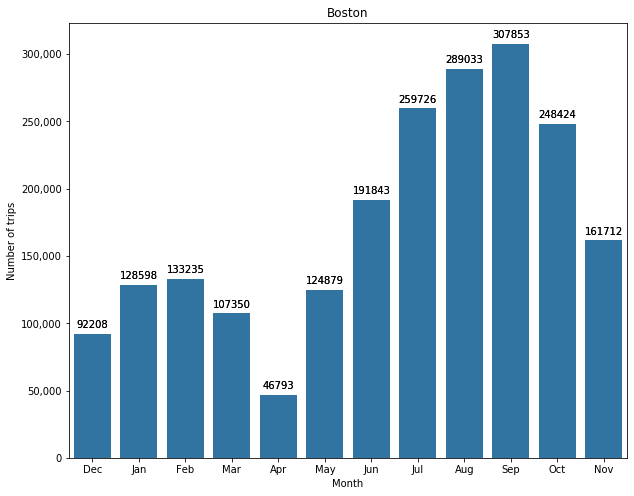

In [13]:
#Chart for Boston
#Asked for help to get the bars in Chronological order 
#(https://knowledge.udacity.com/questions/419539)
plt.figure(figsize = [10, 8])


base_colour = sns.color_palette()[0]
splot = sns.countplot(data=df_b, x='Start month name', color=base_colour);

sns.countplot(data=df_b, x='Start month name', color=base_colour); 

# Logic to print value on each bar
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax = plt.axes()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Boston')
plt.xlabel('Month')   
plt.ylabel('Number of trips');

### Univariate Exploration for Washington

In [14]:
#Display info by month for Washington
df_w.sort_values('Start date')
df_w['Start month name'].value_counts()

Aug    251543
Sep    249872
Oct    229796
Jul    228302
Jun    213995
Jan    196969
Feb    177901
Nov    175789
Mar    162530
Dec    161878
May    148986
Apr     75249
Name: Start month name, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


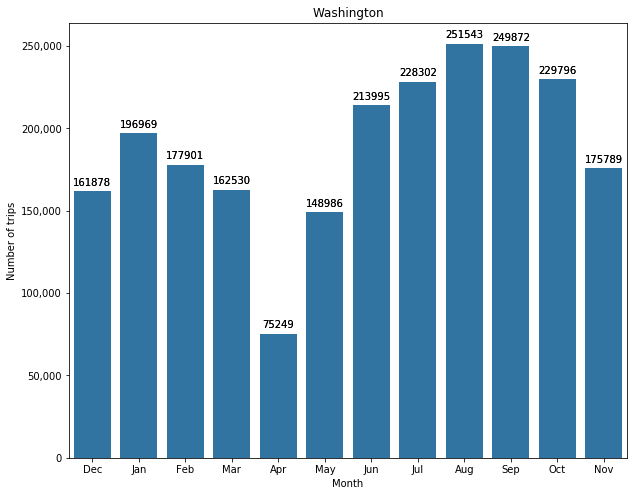

In [15]:
#Chart for Washington
plt.figure(figsize = [10, 8])
base_colour = sns.color_palette()[0]
splot = sns.countplot(data=df_w, x='Start month name', color=base_colour);

sns.countplot(data=df_w, x='Start month name', color=base_colour); 

# Logic to print value on each bar
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax = plt.axes()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Washington')
plt.xlabel('Month')   
plt.ylabel('Number of trips');

## Observation:
The month of April 2020 seems to be an outlier in the data. I was expecting to see lower results in the winter months vs the summer months. It is clear that Jun through to October show the higher numbers as expected. However, April is lower than both March and May, which I did not expect to see. 

First, let have a look whether there is data missing from the data set for the month of April, and let's use May as a comparison. (And seperate this quick analysis by city too)

In [16]:
df_b_april=df_b.copy()
april = df_b['Start month name'] == 'Apr'
df_b_april = df_b[april]


In [17]:
df_b_april['day of month'] = df_b['Start date'].apply(lambda time: time.day)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_b_april['day of month'].value_counts()

25    4435
19    3842
12    2751
11    2301
29    2122
23    2079
5     2073
4     2070
14    2027
7     1988
6     1928
28    1665
17    1580
15    1468
20    1430
16    1358
30    1353
8     1219
1     1167
10    1152
22    1127
26    1014
21     846
24     805
2      674
18     670
9      586
3      388
27     351
13     324
Name: day of month, dtype: int64

In [19]:
df_b_april.shape[0]

46793

In [20]:
df_b_may=df_b.copy()
may = df_b['Start month name'] == 'May'
df_b_may = df_b[may]


In [21]:
df_b_may.shape[0]

124879

In [22]:
df_b_may['day of month'] = df_b['Start date'].apply(lambda time: time.day)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_b_may['day of month'].value_counts()

31    8071
30    7698
3     6194
16    6172
22    5958
24    5543
27    5217
2     5190
26    5004
29    4997
17    4894
21    4795
28    4446
25    4426
14    4256
23    3898
20    3726
15    3541
19    3235
13    2995
7     2910
18    2799
10    2749
5     2687
4     2541
12    2486
6     2173
8     2037
1     1444
9     1438
11    1359
Name: day of month, dtype: int64

In [24]:
df_w_april=df_w.copy()
w_april = df_w['Start month name'] == 'Apr'
df_w_april = df_w[w_april]


In [25]:
df_w_april['day of month'] = df_w['Start date'].apply(lambda time: time.day)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_w_april['day of month'].value_counts()

25    4712
19    4683
5     4437
11    4059
29    3743
12    3243
8     3195
4     3152
6     2864
22    2717
18    2632
3     2486
20    2319
15    2283
17    2174
14    2084
2     2080
16    2078
27    2045
7     1967
21    1905
9     1905
26    1833
24    1828
1     1763
13    1730
28    1683
10    1600
23    1272
30     777
Name: day of month, dtype: int64

In [27]:
df_w_april.shape[0]

75249

In [28]:
df_w_may=df_w.copy()
w_may = df_w['Start month name'] == 'May'
df_w_may = df_w[w_may]


In [29]:
df_w_may.shape[0]

148986

In [30]:
df_w_may['day of month'] = df_w['Start date'].apply(lambda time: time.day)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_w_may['day of month'].value_counts()

30    10733
23     9166
2      9025
16     9012
25     8851
31     7608
24     6339
10     5824
15     5817
17     5659
29     5607
26     4927
27     4800
13     4141
7      3932
21     3729
4      3717
3      3663
14     3610
28     3468
20     3417
19     3202
22     3055
12     3028
1      2969
18     2941
9      2911
5      2374
11     2259
8      1817
6      1385
Name: day of month, dtype: int64

## Observation
#### Continued

No data seems to be missing in this quick analysis. Without going into detail to analyse the time of day, it looks like every day has less data. 
Doing a quick google search I can find some interesing information about the weather in [Boston](https://www.bostonglobe.com/2020/04/30/metro/boston-sees-lowest-high-temperature-april-record/) and [Washington](https://www.wusa9.com/article/weather/april-2020-weather-wet-april-weather-forecast-rain-cool-wet/65-175ffc9a-ac2f-4856-9ba8-f0b49f29e966) which might be the cause for the low numbers.




_________________

## Bivariate Exploration

> Does the trip duration increase in summer months? And is there a difference between the 2 cities? 

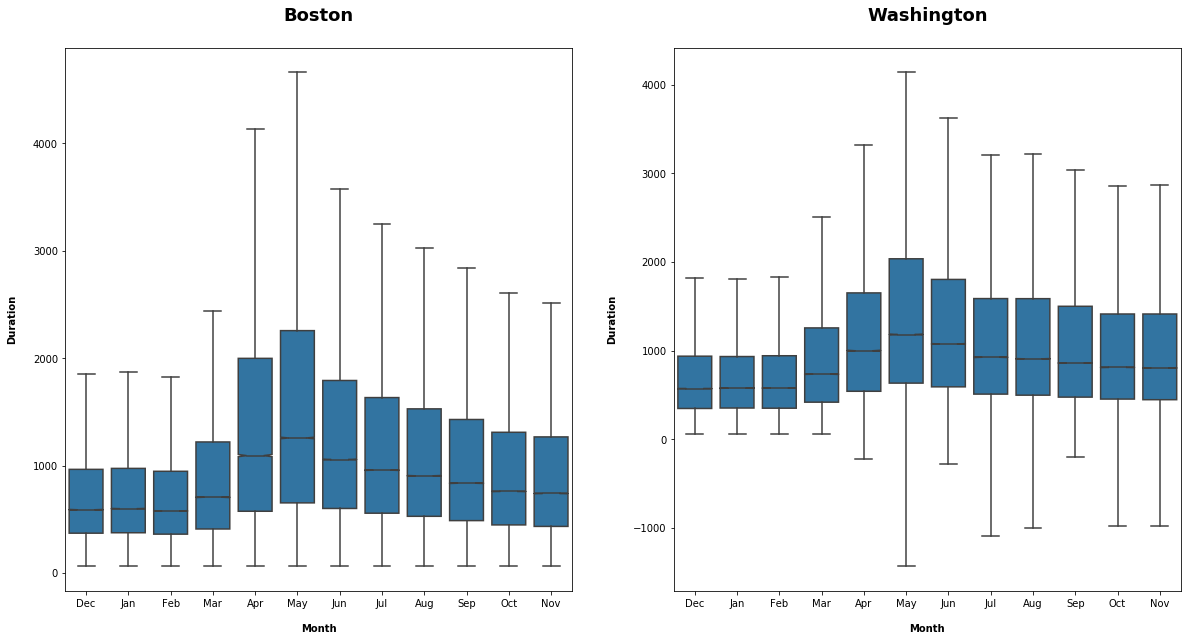

In [32]:

plt.subplots(figsize=(20, 10))
base_colour = sns.color_palette()[0]
plt.subplot(1, 2, 1)
sns.boxplot(x=df_b['Start month name'], y=df_b['Duration'], color = base_colour, showfliers=False, notch=True, linewidth=1.5)
plt.title('Boston\n', fontsize=18, weight='bold')
plt.xlabel('\nMonth', weight='bold')
plt.ylabel('Duration\n', weight='bold');

plt.subplot(1, 2, 2)
sns.boxplot(x=df_w['Start month name'], y=df_w['Duration'], color = base_colour, showfliers=False, notch=True, linewidth=1.5)
plt.title('Washington\n', fontsize=18, weight='bold')
plt.xlabel('\nMonth', weight='bold')
plt.ylabel('Duration\n', weight='bold');

### Note
Quality issue: There are negative duration times in the Washington DataFrame. 

In [33]:
#df_w.query('df_w["Duration"] < 0').count()
negative_duration = df_w[df_w.Duration<0]


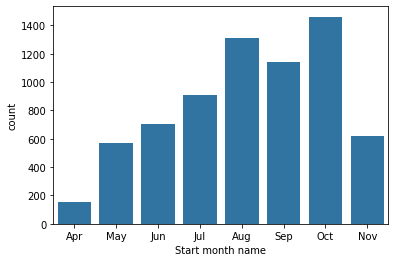

In [34]:
base_colour = sns.color_palette()[0]
sns.countplot(data=negative_duration, x='Start month name', color=base_colour)

In [35]:
(negative_duration.shape[0]/df_w.shape[0])*100

0.3021810006115777

#### Note _Continued_  

0.3% of the data has negative durations. In the DataFrame the End Date (and time) is before the Start Date (and time). These rows will be dropped from the DataFrame 

In [36]:
df_w.drop(df_w[df_w.Duration<0].index, inplace = True)

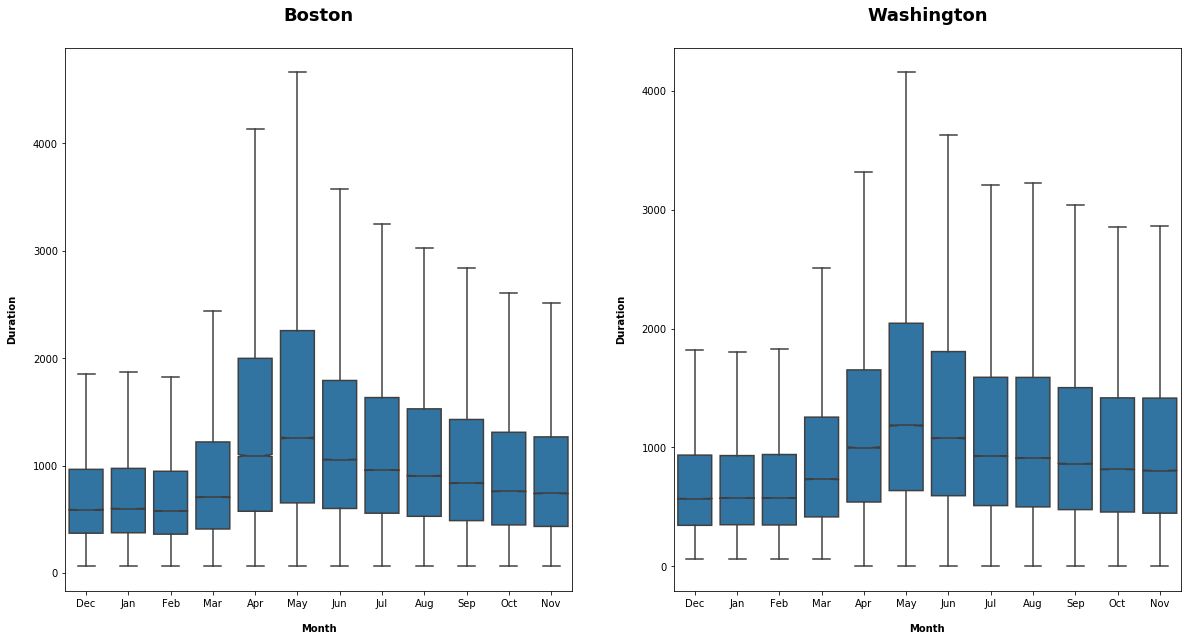

In [37]:
plt.subplots(figsize=(20, 10))
base_colour = sns.color_palette()[0]
plt.subplot(1, 2, 1)
sns.boxplot(x=df_b['Start month name'], y=df_b['Duration'], color = base_colour, showfliers=False, notch=True, linewidth=1.5)
plt.title('Boston\n', fontsize=18, weight='bold')
plt.xlabel('\nMonth', weight='bold')
plt.ylabel('Duration\n', weight='bold');

plt.subplot(1, 2, 2)
sns.boxplot(x=df_w['Start month name'], y=df_w['Duration'], color = base_colour, showfliers=False, notch=True, linewidth=1.5)
plt.title('Washington\n', fontsize=18, weight='bold')
plt.xlabel('\nMonth', weight='bold')
plt.ylabel('Duration\n', weight='bold');

## Observation
Both cities seem to have longer durations for their trips in the spring and summer months (Assuming April-Jun is spring, and Jul-Sep is summer). 
Although the first Univariate showed low data sets for April, the duration looks to be inline with the expectation and the trend shown in the month before and after.
Both cities show a similar seasonal trend as I had also expected.

## Multivariate Exploration

> Is there a noticeable trend in average trip duration by month and is the trip duration is in any way related to the specific type of member?

In [38]:
member_type_avg = df_w.groupby('Member type').mean()['Duration']/60
member_type_avg

Member type
Casual    38.523502
Member    13.170394
casual    46.971788
member    17.782346
Name: Duration, dtype: float64

In [39]:
df_w['Member type'] = df_w['Member type'].str.capitalize()


In [40]:
member_type_avg = df_w.groupby('Member type').mean()['Duration']/60
member_type_avg

Member type
Casual    46.455670
Member    15.734378
Name: Duration, dtype: float64

In [41]:
#Asked Udacity  Knowledge for assistance https://knowledge.udacity.com/questions/433584
month_order = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
df_w['Start month name'] = pd.Categorical(df_w['Start month name'],
                                         categories = month_order,
                                         ordered = True)

In [42]:
duration_by_month = df_w.groupby(['Member type','Start month name'])['Duration'].mean().unstack('Member type')/60
duration_by_month

Member type,Casual,Member
Start month name,,
Dec,35.863652,12.176278
Jan,36.090620,12.350116
Feb,36.001213,12.344883
Mar,43.471695,16.191434
Apr,77.642361,23.288036
May,61.190017,20.999573
Jun,55.402274,20.262678
Jul,46.700073,16.984113
Aug,42.779399,17.295742


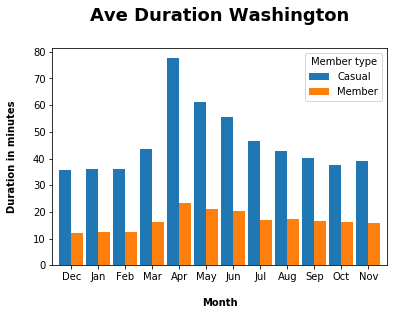

In [43]:
duration_by_month.plot.bar(rot=0, width = 0.9)
plt.title('Ave Duration Washington\n', fontsize=18, weight='bold')
plt.xlabel('\nMonth', weight='bold')
plt.ylabel('Duration in minutes\n', weight='bold');

## Observation
All months clearly show longer durations for Casual users than Member users. This is what I expected to see, as I'd expect members to use the bike for a short commute, where casuals would use the bike to go on a leisurely bike ride. 

An interesting obersation is that the duration for bike rides in April is the highest for both casuals and members. This is interesting to see given that we saw earlier that the numbers of rides were very low in April. 

------------------
Repeat the above steps for Boston

In [44]:
member_type_avg_b = df_b.groupby('Member type').mean()['Duration']/60
member_type_avg_b

Member type
Customer      67.040666
Subscriber    16.739981
Name: Duration, dtype: float64

In [45]:
df_b['Start month name'] = pd.Categorical(df_b['Start month name'],
                                         categories = month_order,
                                         ordered = True)

In [46]:
duration_by_month_b = df_b.groupby(['Member type','Start month name'])['Duration'].mean().unstack('Member type')/60
duration_by_month_b

Member type,Customer,Subscriber
Start month name,,
Dec,85.100645,13.538824
Jan,57.758925,12.665348
Feb,66.341282,12.713823
Mar,79.297712,14.987010
Apr,94.876171,25.789941
May,80.422532,22.901311
Jun,72.508178,20.281363
Jul,77.352987,18.867117
Aug,59.169707,18.022137


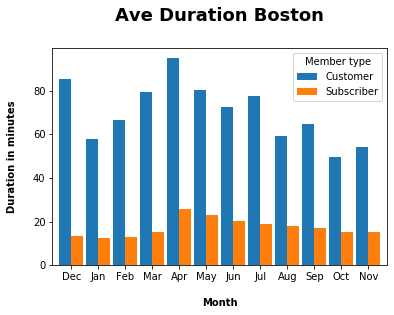

In [47]:
duration_by_month_b.plot.bar(rot=0, width = 0.9)
plt.title('Ave Duration Boston\n', fontsize=18, weight='bold')
plt.xlabel('\nMonth', weight='bold')
plt.ylabel('Duration in minutes\n', weight='bold');

In [50]:
trips_by_month_b = df_b.groupby(['Member type','Start month name'])['Duration'].count().unstack('Member type')/60
trips_by_month_b

Member type,Customer,Subscriber
Start month name,,
Dec,181.833333,1354.966667
Jan,239.483333,1903.816667
Feb,234.316667,1986.266667
Mar,323.016667,1466.150000
Apr,235.300000,544.583333
May,837.716667,1243.600000
Jun,1135.000000,2062.383333
Jul,1465.466667,2863.300000
Aug,1525.516667,3291.700000


## Observation
Similarly to Washington, all months clearly show longer durations for Customer users than Subscriber users. This is what I expected to see, as I'd expect subscribers to use the bike for a short commute, where customers (casuals) would use the bike to go on a leisurely bike ride. 

An interesting obersation is that the duration for bike rides in April is the highest for both casuals and members. This is interesting to see given that we saw earlier that the numbers of rides were very low in April. 

Also intersting that Washington __and__ Boston show this in the month of April. 

Also the duration for customers in December is on average over an hour. Which is intersting, assuming December is a reasonably cold month in Boston. Just to verify that result I had a look at the number of trips, to ensure only a few very long trips didn't distort the average for December. But it doesn't seem that December has an unexpected extremely low number of rides. It could be worth digging into this further and perhaps have a look at the individual durations for December for customers. (E.g. is there 1 or 2 rides that go over multiple days which would bring up the average duration for that partcilar month?)

